# Methods of Signal Visualization 

In [11]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from scipy.signal import chirp, spectrogram
from scipy.fftpack import fft, ifft
from scipy.io.wavfile import write 

import os
from os import path
if os.path.isdir("./data/"):
    pass
else:
    !mkdir ./data

if os.path.isdir("./figs/"):
    pass
else:
    !mkdir ./figs

Running Python: 3.12.6
Running Sympy: 1.13.2


In [34]:
fs = 44100 # sample rate
tf = 1 # final time
t = np.linspace(0,tf,int(tf*fs)) # time signal for plotting
NFFT = 2**(int(np.log2(len(t)))) # lowest power of 2 for FFT alg
freq = fs*np.arange(0,1,1/NFFT) # frequency vector for plotting

## Time Domain/Sound Signal Visualization 

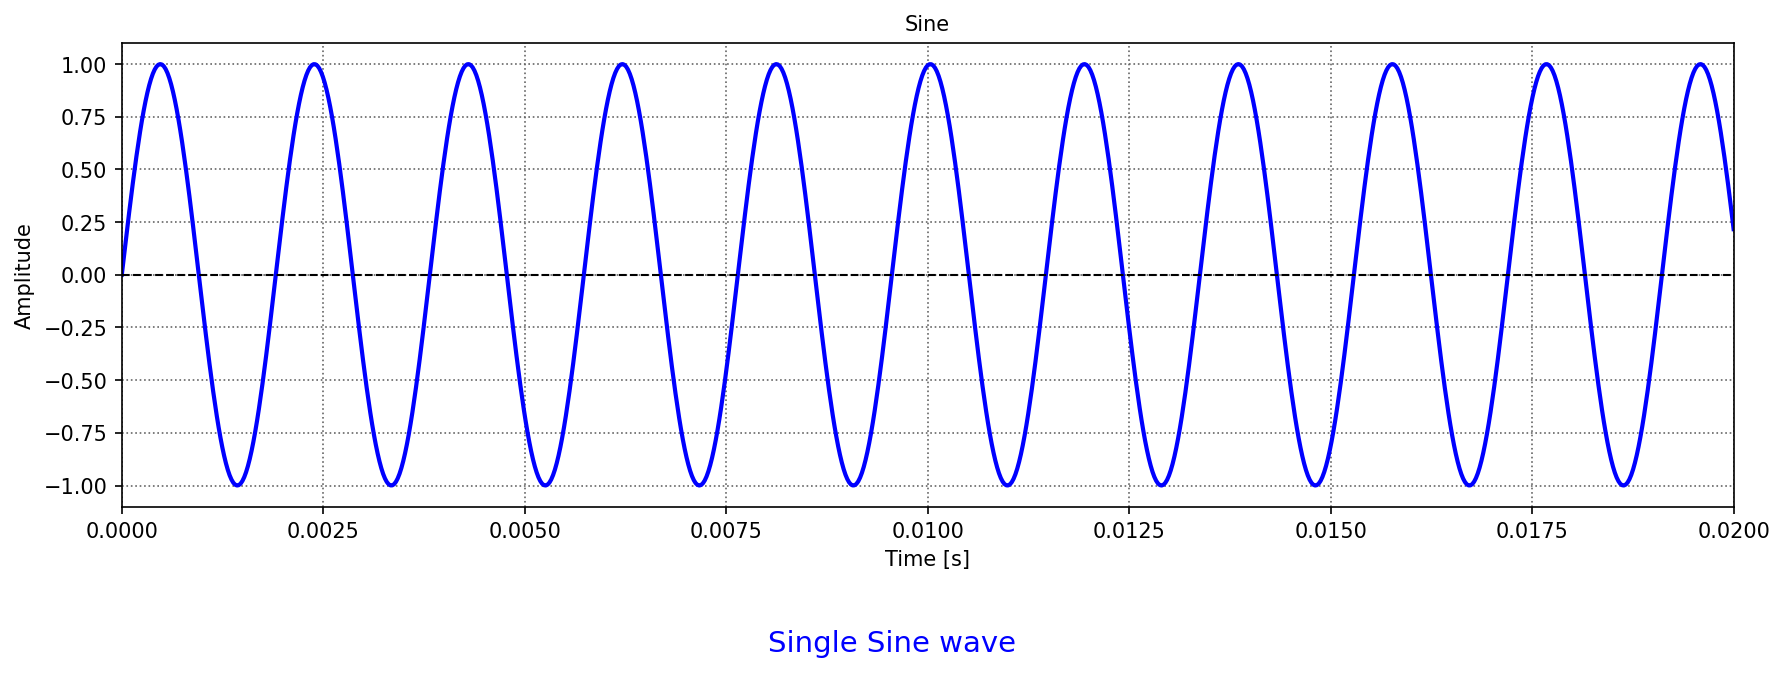

In [35]:
# Sine
f0 = 523.25 # C5

phi0 = 2*np.pi*f0*t
y0 = np.sin(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y0,'b-')
plt.xlim([0,0.02])
plt.title('Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
nicegrid()
caption('Single Sine wave',fig)
plt.show()

In [36]:
write("data/y0.wav", fs, y0.astype(np.float32))
ipd.Audio('data/y0.wav', rate = fs) # 

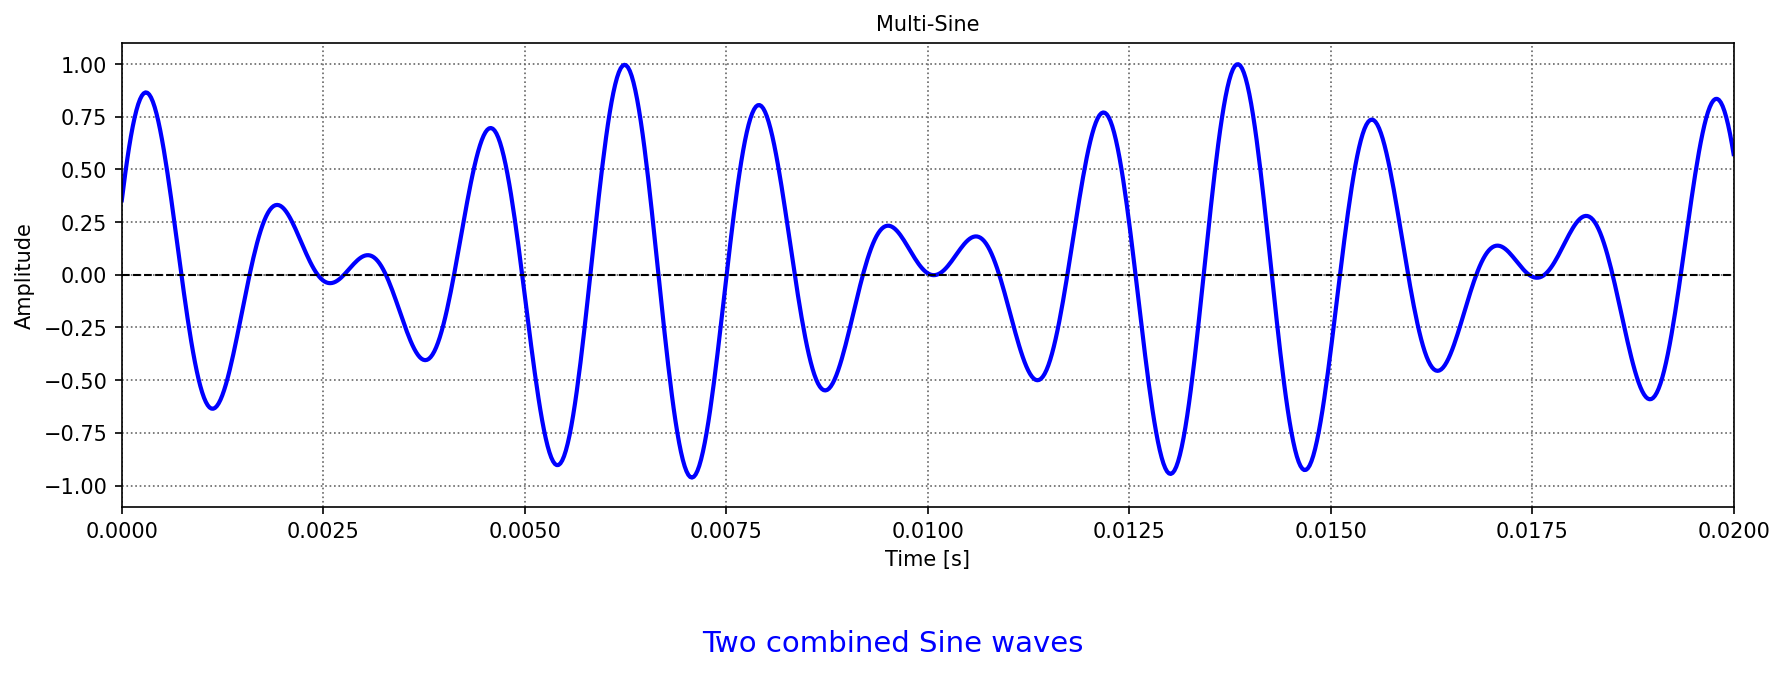

In [37]:
# multisine
f1 = 659.25 # E5
offset = np.pi/4
phi1 = 2*np.pi*f1*t + offset

y01 = y0 + np.sin(phi1);
y01 = y01/np.max(y01); # normalize

fig = plt.figure(figsize=(12,4))
plt.plot(t,y01,'b-')
plt.xlim([0,0.02])
plt.title('Multi-Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
nicegrid()
caption('Two combined Sine waves',fig)
plt.show()

write("data/y01.wav", fs, y01.astype(np.float32))
ipd.Audio('data/y01.wav', rate=fs) # 

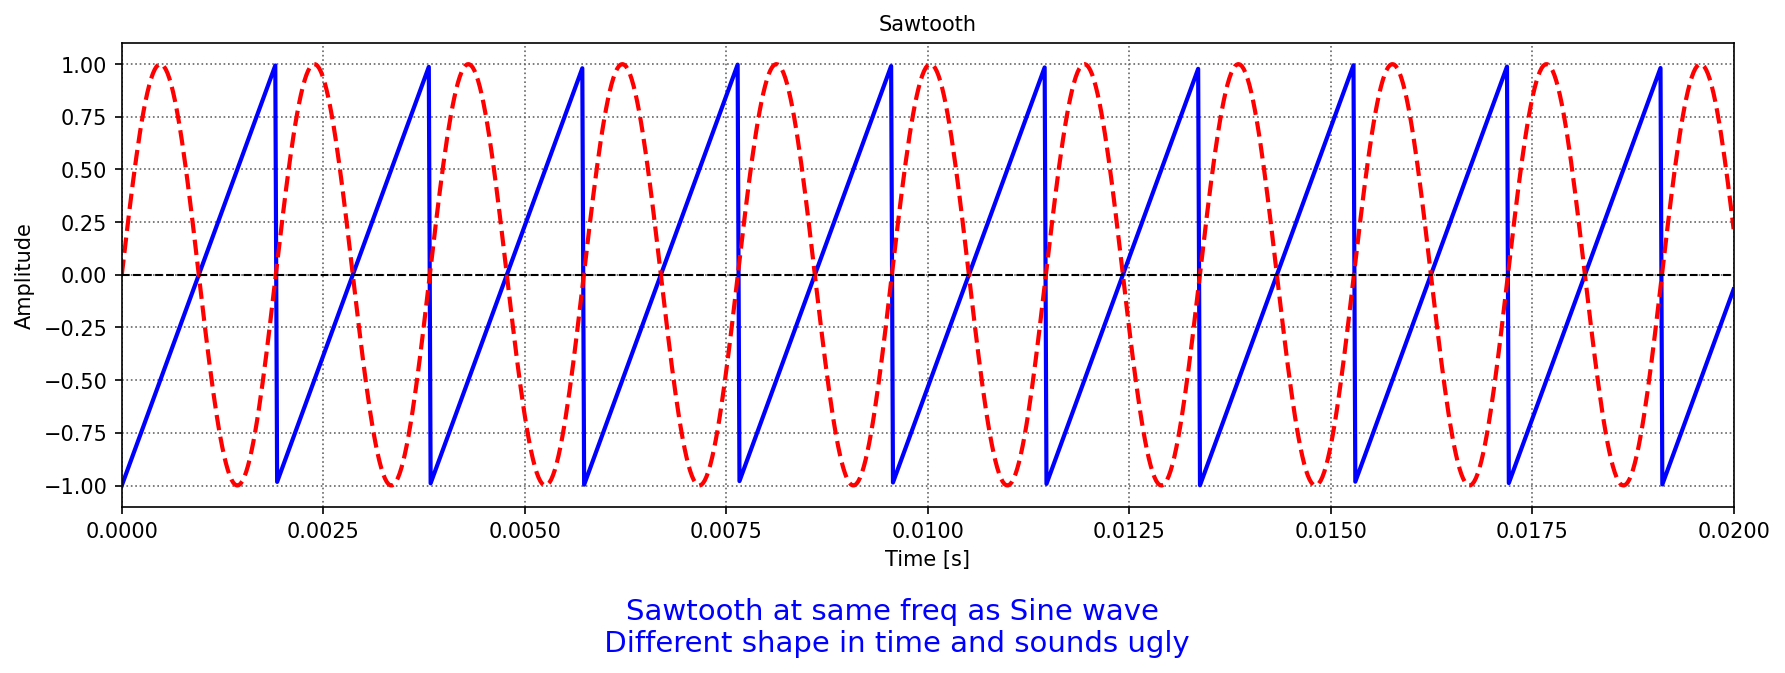

In [38]:
# Sawtooth
ys1 = signal.sawtooth(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys1,'b-')
plt.plot(t,y0,'r--')
plt.xlim([0,0.02])
plt.title('Sawtooth')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
nicegrid()
caption('Sawtooth at same freq as Sine wave\n Different shape in time and sounds ugly',fig)
plt.show()

write("data/ys1.wav", fs, ys1.astype(np.float32))
ipd.Audio('data/ys1.wav', rate=fs) # 

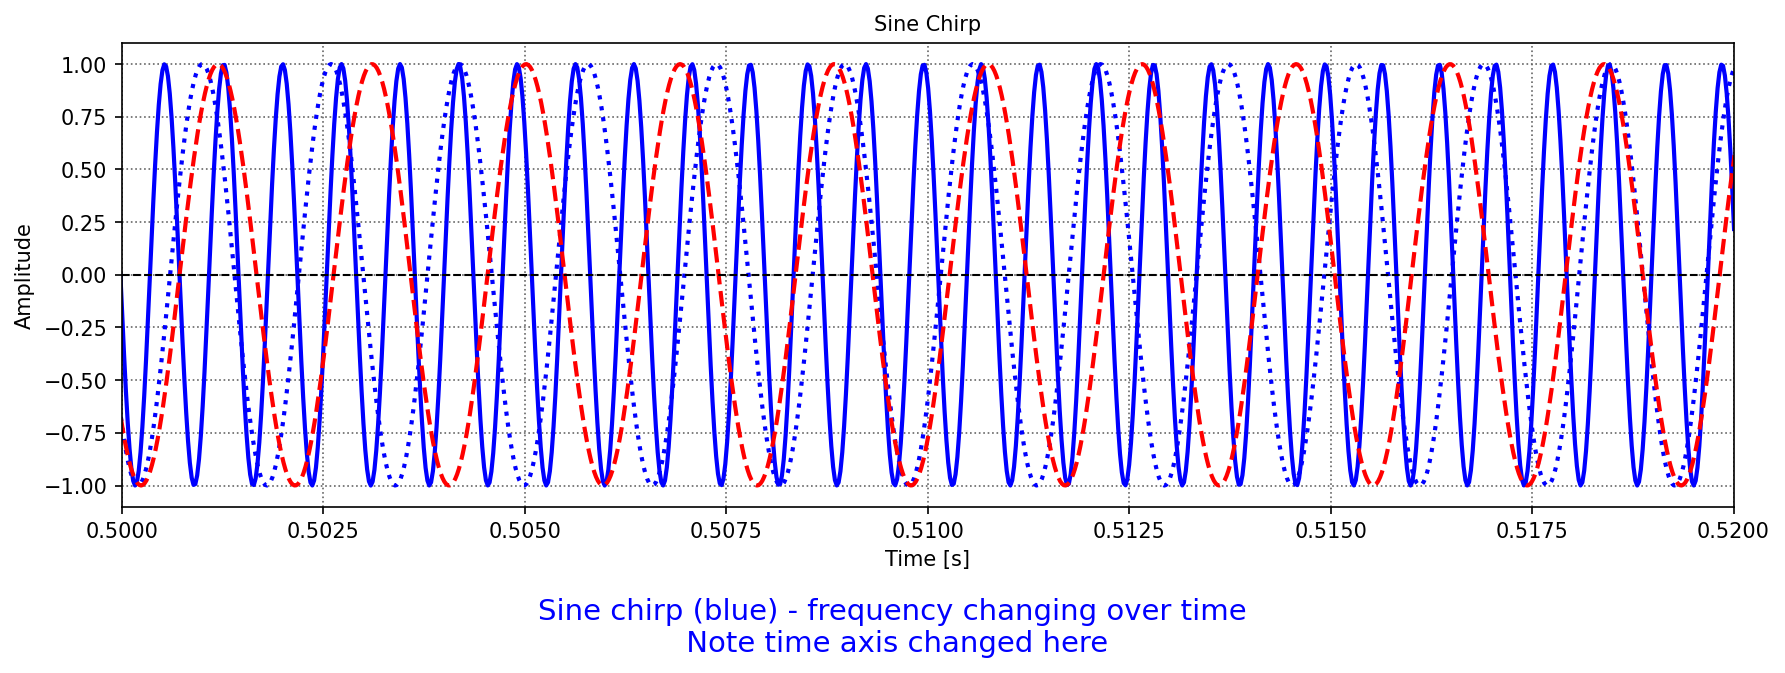

In [52]:
# Sine chirp - frequency changes with time
beta = (f1 - f0) / tf**2
phi2 = 2*np.pi*(fchirp(t) * t)
y2 = np.sin(phi2);

tf_long = 2
t_long = np.linspace(0,tf_long,int(tf_long*fs)) # time signal for plotting
beta = (5e3 - f0) / tf_long**2

# for a chirp the frequency changes with time
fchirp = lambda t: f0 + beta * t**2

phi2_long = 2*np.pi*fchirp(t_long) * t_long
y2_long = np.sin(phi2_long);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y2,'b:')
plt.plot(t_long,y2_long,'b-')
plt.plot(t,y0,'r--')
plt.xlim([tf/2,tf/2+0.02])
plt.title('Sine Chirp')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
nicegrid()
caption('Sine chirp (blue) - frequency changing over time\n Note time axis changed here',fig)
plt.show()

write("data/y2.wav", fs, y2_long.astype(np.float32))
ipd.Audio('data/y2.wav', rate=fs) # 

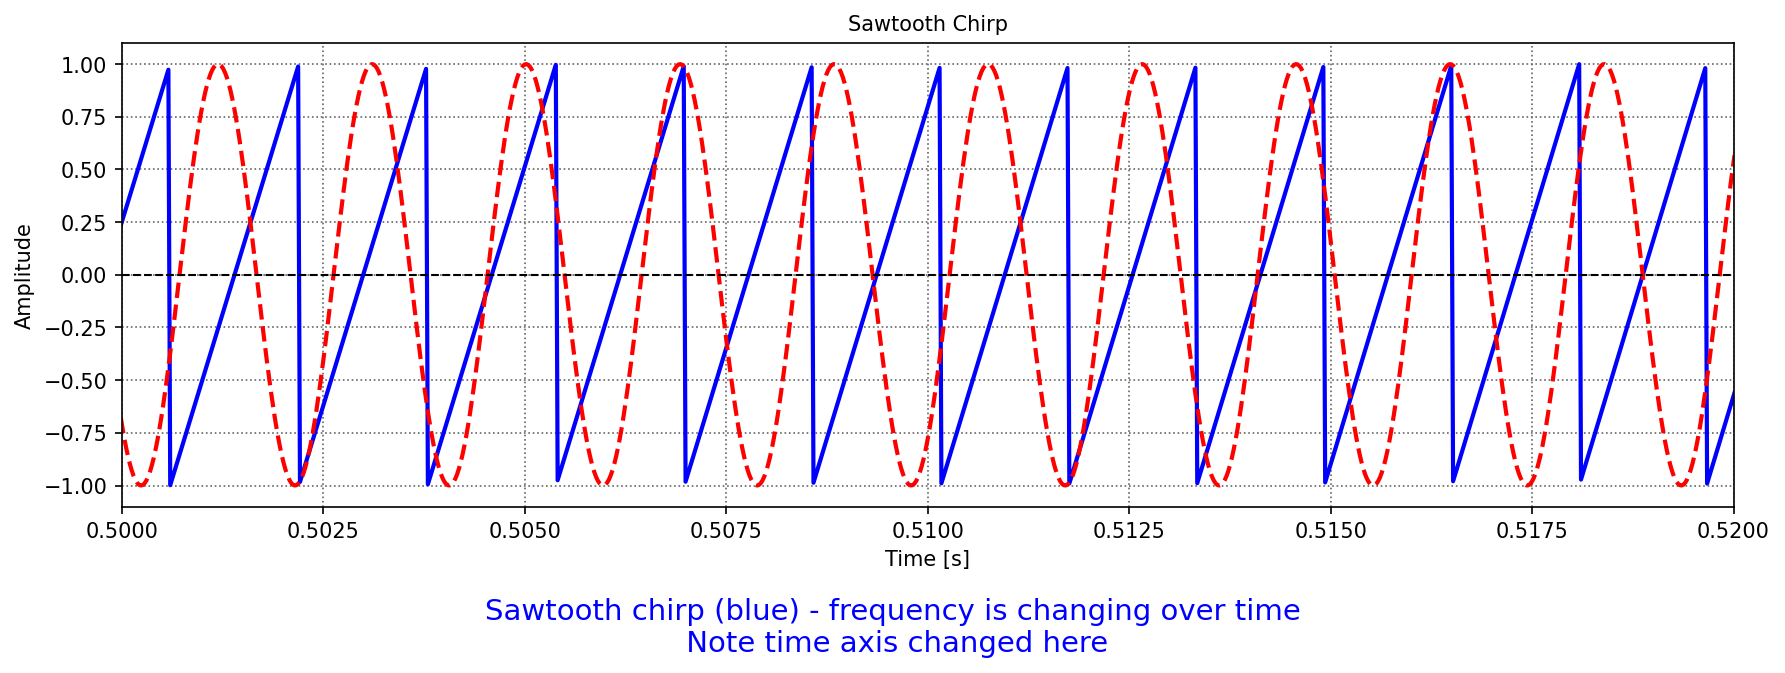

In [40]:
# Sawtooth chirp
beta = (f1 - f0) / tf**2
# for a chirp the frequency changes with time
fchirp = lambda t: f0 + beta * t**2

phi2 = 2*np.pi*(fchirp(t) * t)
ys2 = signal.sawtooth(phi2);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys2,'b-')
plt.plot(t,y0,'r--')
plt.xlim([tf/2,tf/2+0.02])
plt.title('Sawtooth Chirp')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
nicegrid()
caption('Sawtooth chirp (blue) - frequency is changing over time\n Note time axis changed here',fig)
plt.show()

write("data/ys2.wav", fs, ys2.astype(np.float32))
ipd.Audio('data/ys2.wav', rate=fs) # 

## Frequency Domain Signal Visualization 

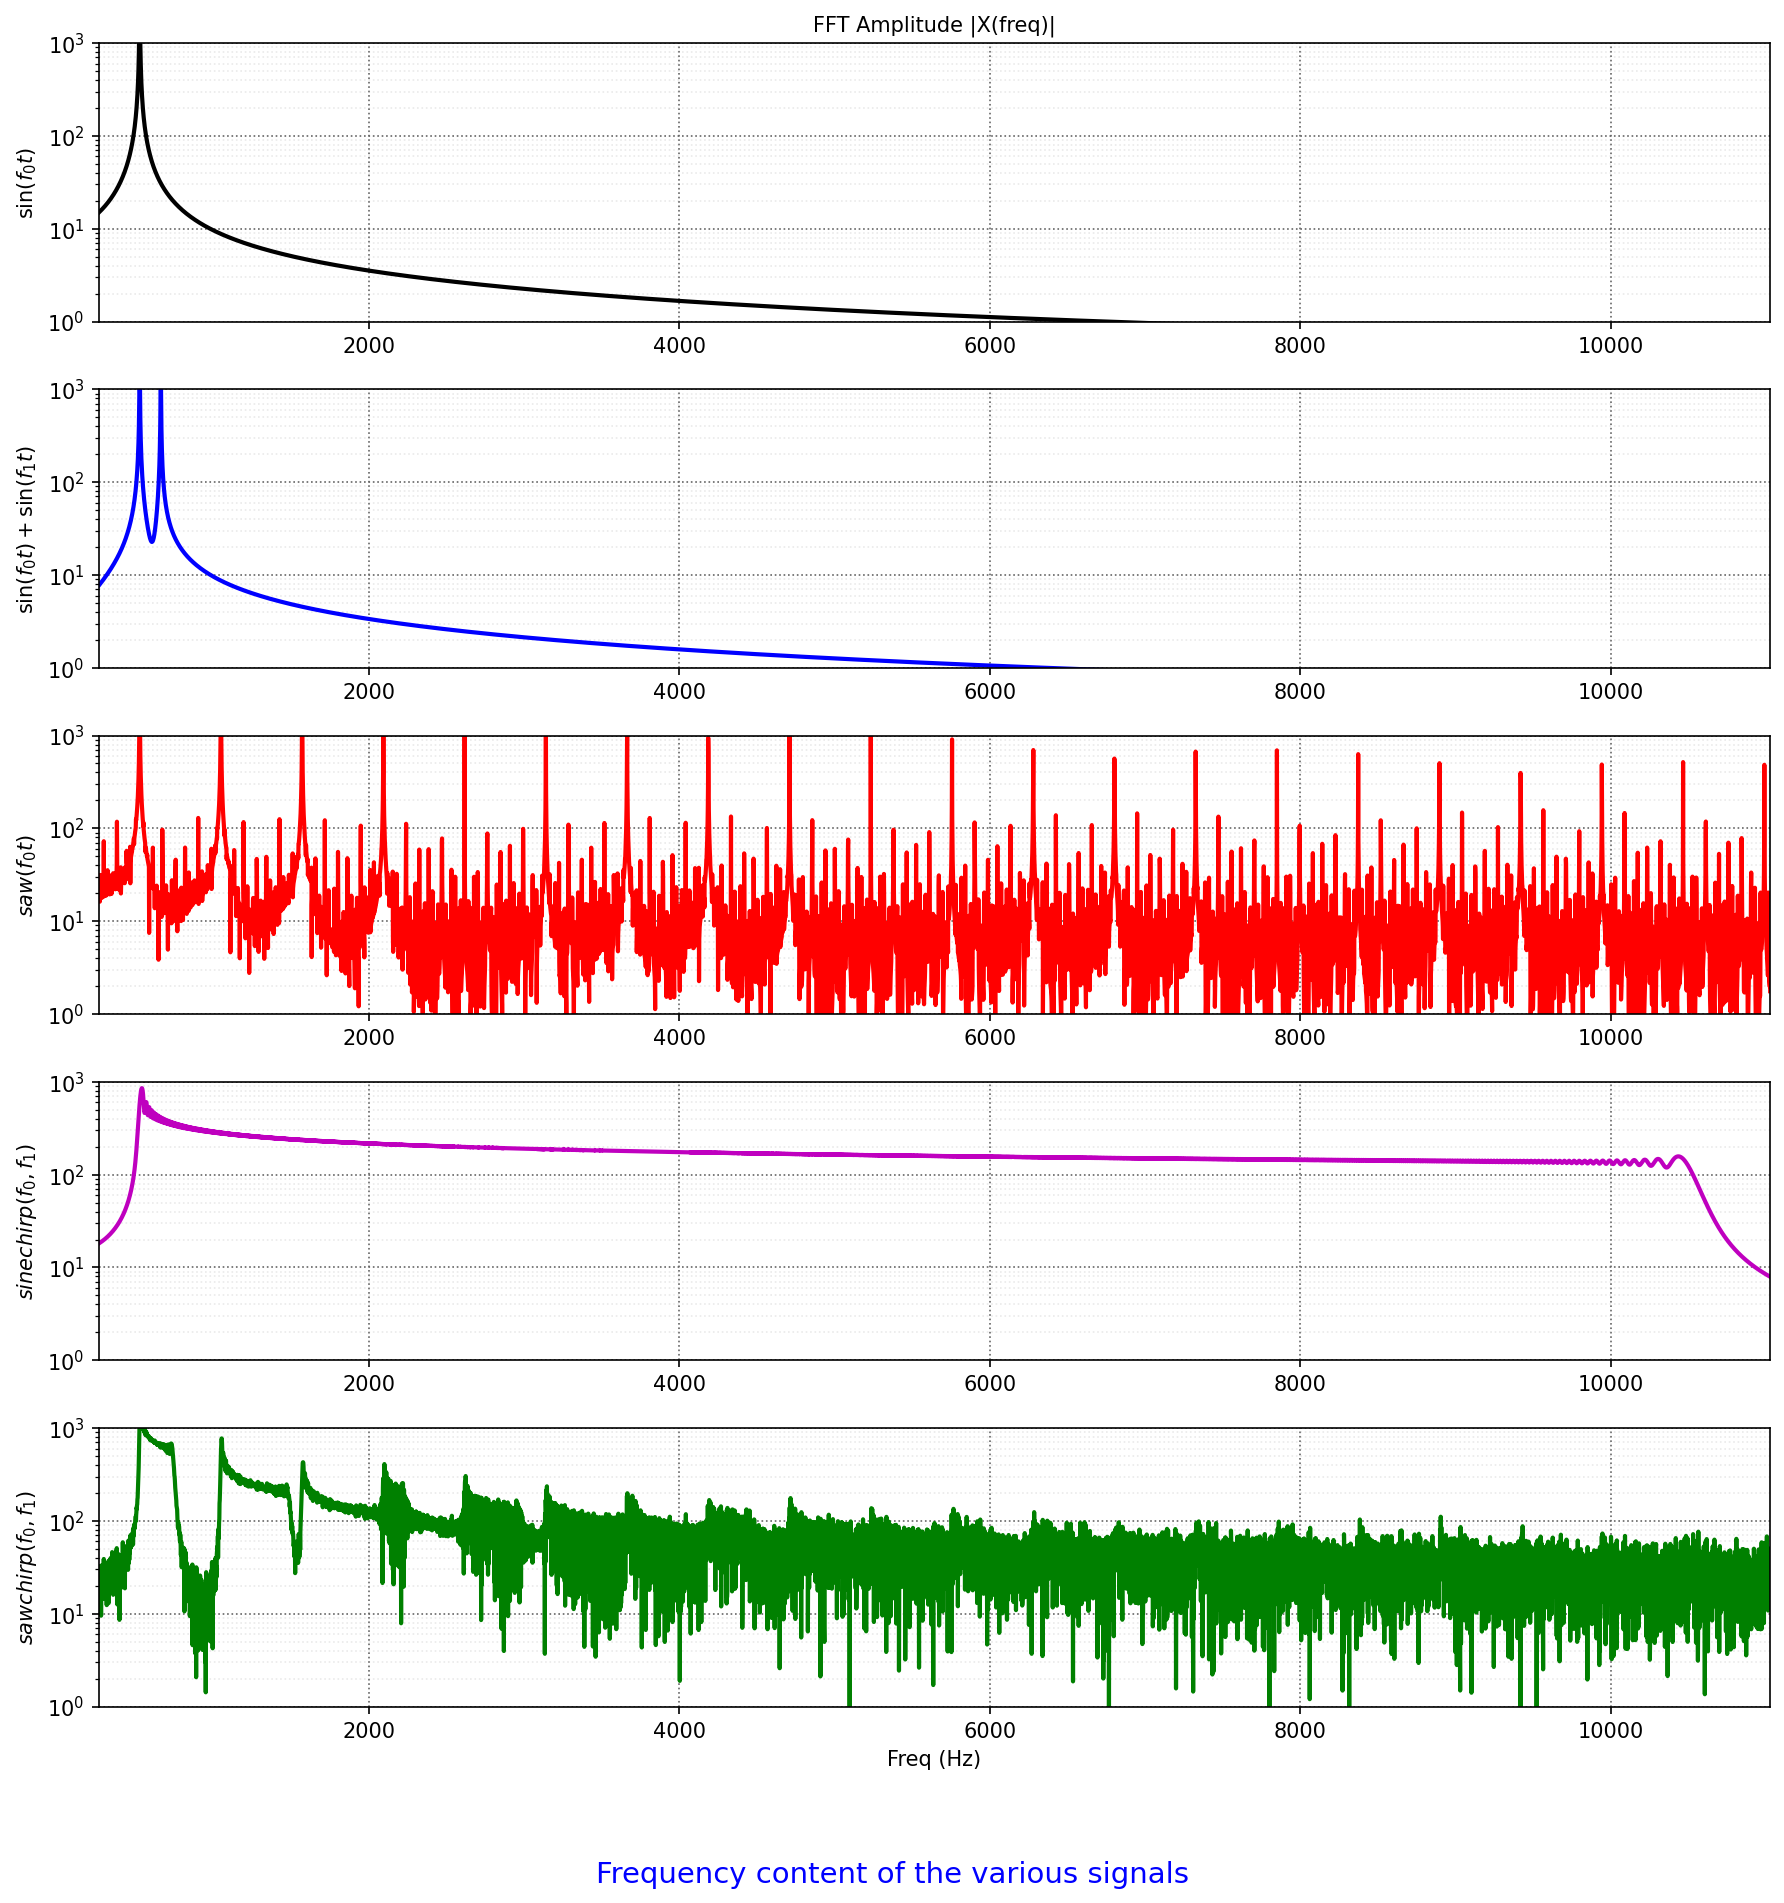

In [41]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(511)
X = fft(y0[:NFFT])
ax1.semilogy(freq, np.abs(X), colors[0])
ax1.set_ylabel('$\sin(f_0 t)$')
ax1.set_title('FFT Amplitude |X(freq)|')
nicegrid(ax1)
ax1.set_ylim(1, 1000)
ax1.set_xlim(f0/2, fs/4)

ax2 = plt.subplot(512,sharex=ax1,sharey=ax1)
X = fft(y01[:NFFT])
ax2.semilogy(freq, np.abs(X), colors[1])
ax2.set_ylabel('$\sin(f_0 t)+\sin(f_1 t)$')
nicegrid(ax2)

ax3 = plt.subplot(513,sharex=ax1,sharey=ax1)
X = fft(ys1[:NFFT])
ax3.semilogy(freq, np.abs(X), colors[2])
ax3.set_ylabel('$saw(f_0 t)$')
nicegrid(ax3)

ax22 = plt.subplot(514,sharex=ax1,sharey=ax1)
X = fft(y2[:NFFT])
ax22.semilogy(freq, np.abs(X), colors[3])
ax22.set_ylabel('$sinechirp(f_0,f_1)$')
nicegrid(ax22)

ax4 = plt.subplot(515,sharex=ax1,sharey=ax1)
X = fft(ys2[:NFFT])
ax4.semilogy(freq, np.abs(X), colors[4])
ax4.set_ylabel('$sawchirp(f_0,f_1)$')
nicegrid(ax4)
ax4.set_xlabel('Freq (Hz)')
caption('Frequency content of the various signals',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_001.png', bbox_inches='tight', dpi=300)

## Frequency/Time Signal Visualization - Signal Variations

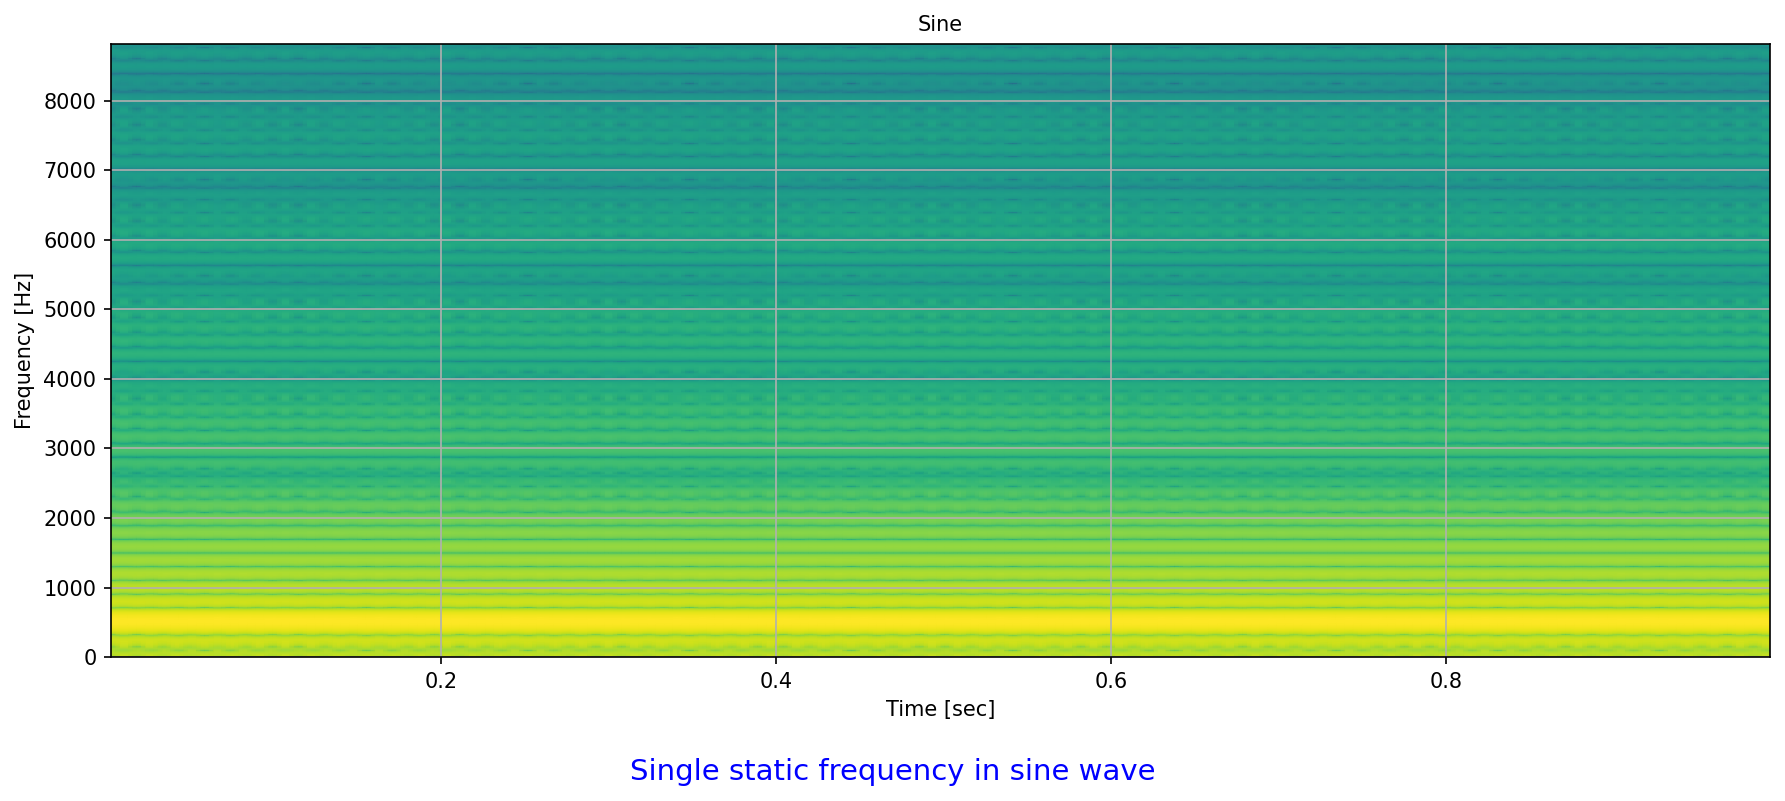

In [20]:
ff0, tt0, Sxx0 = signal.spectrogram(y0, fs, detrend=False, nfft = NFFT)
ff01, tt01, Sxx01 = signal.spectrogram(y01, fs, detrend=False, nfft = NFFT)
ff2, tt2, Sxx2 = signal.spectrogram(y2, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,5))
plt.pcolormesh(tt0, ff0, np.log10(Sxx0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sine')
plt.ylim([0,fs/5])
caption('Single static frequency in sine wave',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_002.png', bbox_inches='tight', dpi=300)

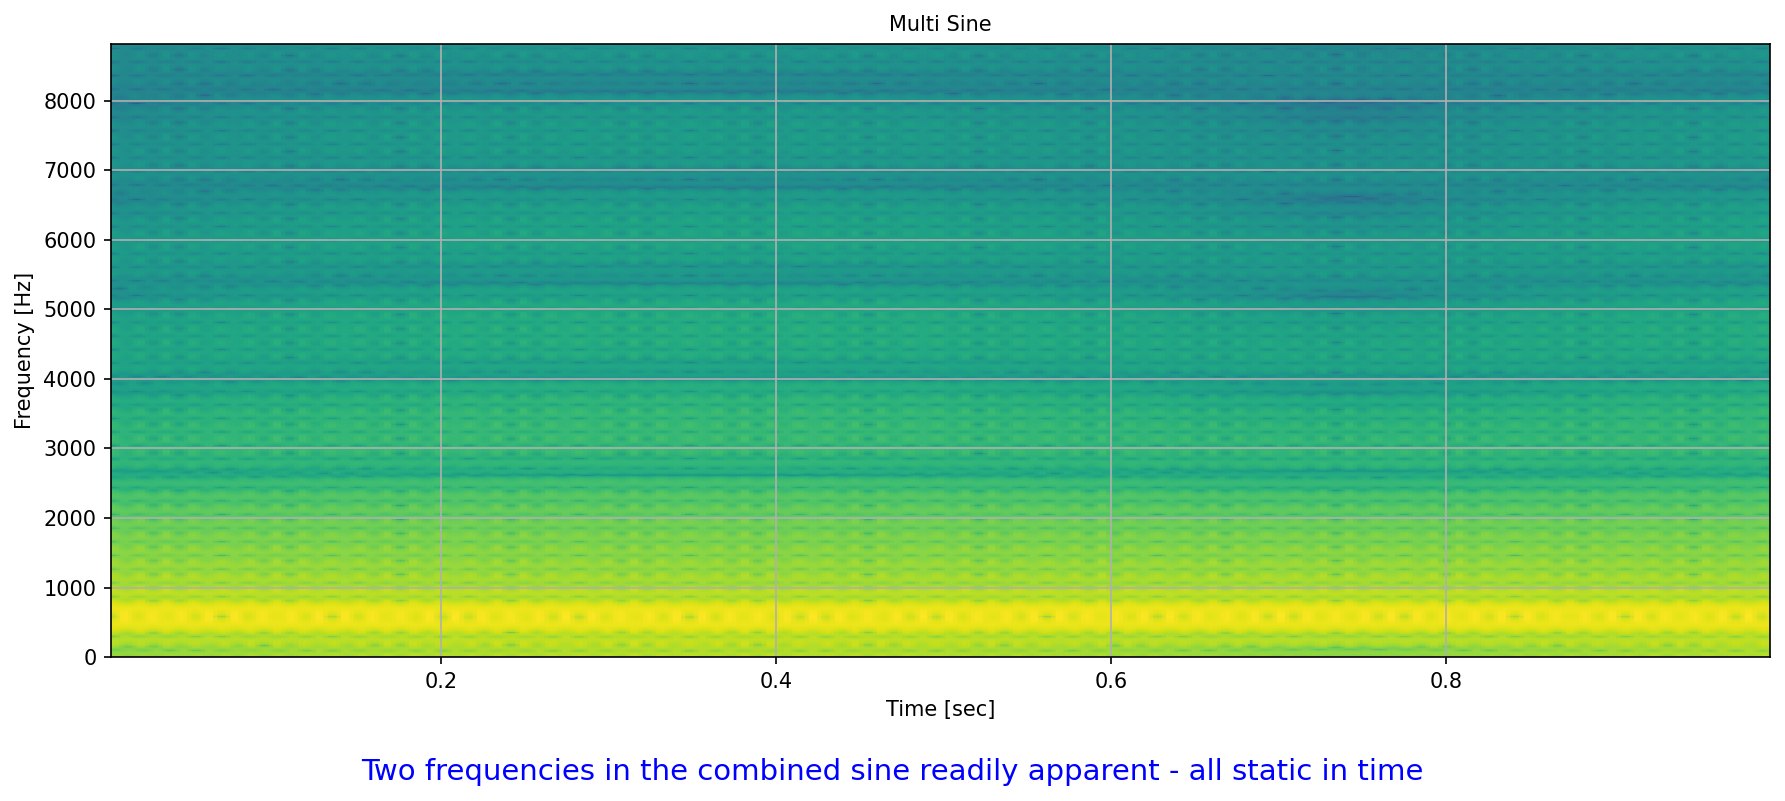

In [21]:
fig = plt.figure(figsize=(12,5))
plt.pcolormesh(tt01, ff01, np.log10(Sxx01), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Multi Sine')
plt.ylim([0,fs/5])
caption('Two frequencies in the combined sine readily apparent - all static in time',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_003.png', bbox_inches='tight', dpi=300)

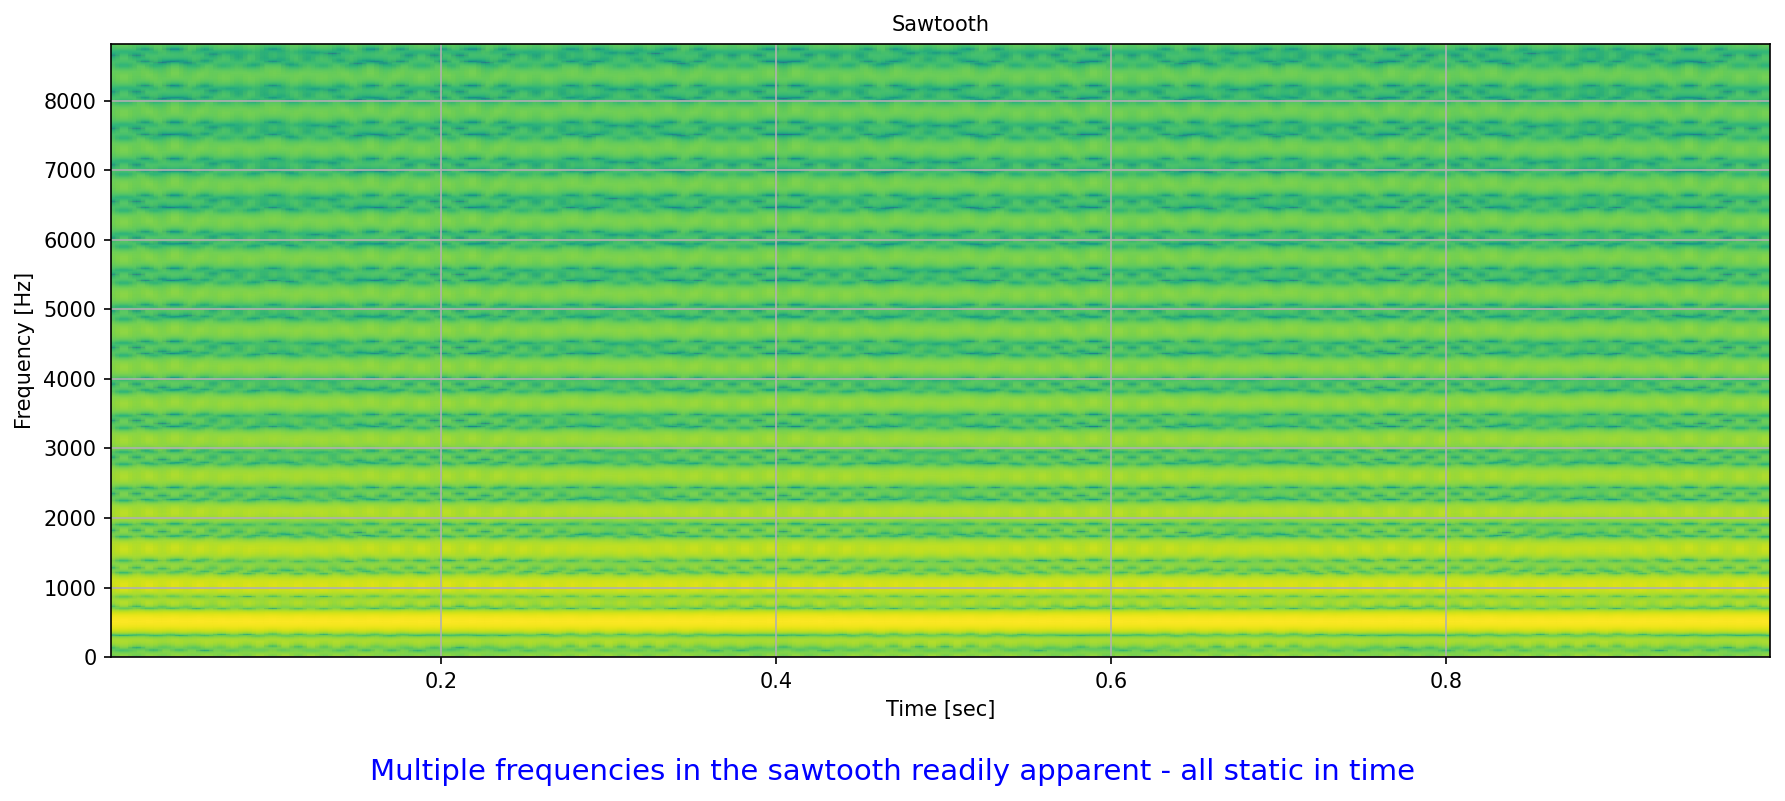

In [22]:
ffs1, tts1, Sxxs1 = signal.spectrogram(ys1, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,5))
plt.pcolormesh(tts1, ffs1, np.log10(Sxxs1), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sawtooth')
plt.ylim([0,fs/5])
caption('Multiple frequencies in the sawtooth readily apparent - all static in time',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_004.png', bbox_inches='tight', dpi=300)

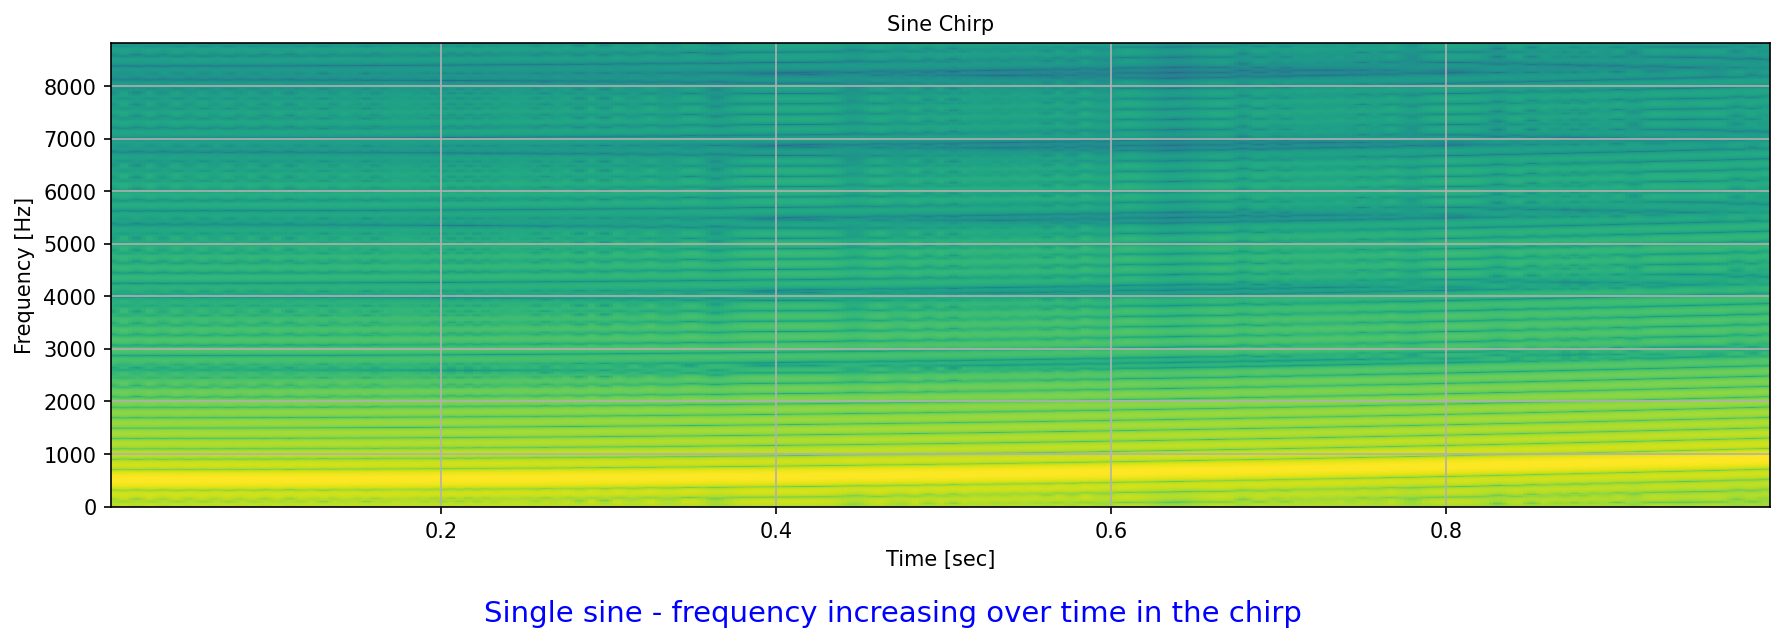

In [23]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt2, ff2, np.log10(Sxx2), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sine Chirp')
plt.ylim([0, fs/5])
caption('Single sine - frequency increasing over time in the chirp',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_005.png', bbox_inches='tight', dpi=300)

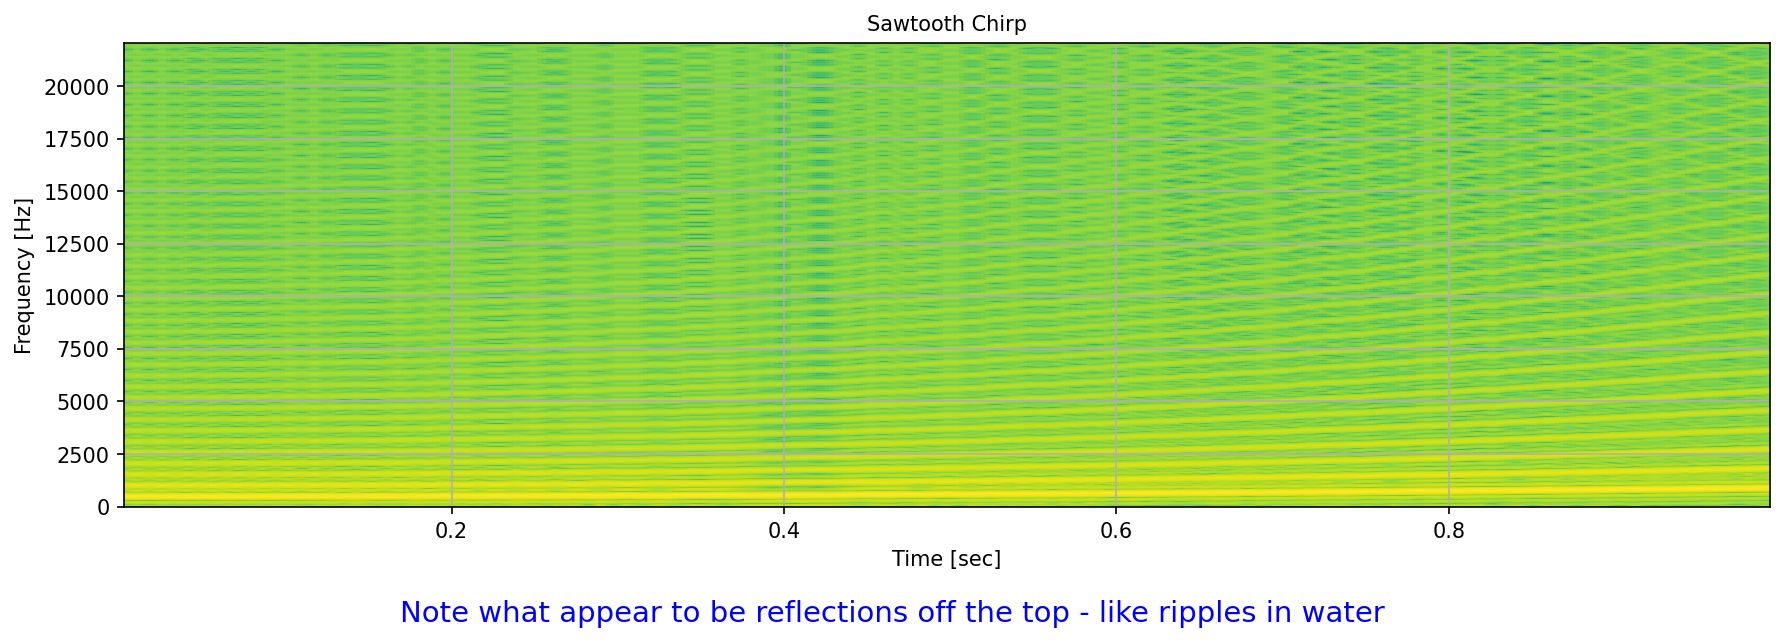

In [24]:
ffs2, tts2, Sxxs2 = signal.spectrogram(ys2, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tts2, ffs2, np.log10(Sxxs2), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sawtooth Chirp')
plt.ylim([0, fs/2])
caption('Note what appear to be reflections off the top - like ripples in water',fig,yloc=-0.05)
plt.show()
fig.savefig('./figs/FreqVisual_006.png', bbox_inches='tight', dpi=300)